# Plotting New York State (NYS) Mesonet Data with Archived High-Resolution Rapid Refresh (HRRR) Model Data
This notebook plots NYS Mesonet data from surface-based flux, standard, and profiler site information from 2023-06-06 through 2023-06-07 to analyze the surface energy budget under a severe Canadian wildfire smoke event in the northeast United States. This code was written for a final project in MET 335 (Micrometeorology) at SUNY Oswego during the Fall 2025 semester. </p>
#### **Disclaimer:** To navigate this notebook, please see the *Table of Contents* where you will find three key sections: Part 1 *(spatial plots)*, Part 2 *(temporal plots)*, and Part 3 *(profiler plots)* </p>
#### **RESOURCES:** </p>
>[Request NYS Mesonet data (please take note of their disclaimer at the top of the webpage](https://www.nysmesonet.org/weather/requestdata) </p>
>[Herbie module documentation](https://herbie.readthedocs.io/en/latest/index.html) </p>
>[HRRR variable list](https://mesowest.utah.edu/html/hrrr/zarr_documentation/html/zarr_variables.html) </p>
>[**Flux** NYS Mesonet network documentation](https://www.nysmesonet.org/documents/NYSM_Readme_Flux.pdf) </p>
>[**Standard** NYS Mesonet network documentation](https://www.nysmesonet.org/documents/NYSM_Readme_Standard.pdf) </p>
>[**Profiler** NYS Mesonet network documentation](https://nysmesonet.org/documents/NYSM_Readme_Profiler.pdf) </p>
***

## INSTALLATIONS & IMPORTS
Install and import all necessary packages and modules. Also, import necessary datasets
***

In [1]:
pip install herbie-data

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install cmweather

In [3]:
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import pandas as pd
import numpy as np
from herbie import Herbie
import matplotlib as mplt
import matplotlib.cm as cm
import cmweather

In [4]:
# flux dataset
df=pd.read_csv(r'/home/jovyan/Desktop/Micrometeorology/DATA/Flux_NYSMesonet_202306.csv')
df.rename(columns={
    'stid':'site ID', 
    'FC':'CO2 Flux', 
    'LE': 'HL', 
    'TAU':'Momentum Flux',
    'Bowen_ratio':'B',
    'ZL': 'PBL Stability',
    'TKE': 'Specific Turb E',
    'rho_a':'rho_v'
}, inplace=True)
df['datetime']=pd.to_datetime(df['datetime'])
df.columns
# LWS_volt: Leaf sensor. Voltage output related to mass of standing water on a leaf
# G_HFP01_#: Soil heat flux measured by a single heat flux plate, GHFP01-(1-4)

Index(['site ID', 'datetime', 'CO2 Flux', 'FC_QC', 'HL', 'LE_QC', 'ET',
       'ET_QC', 'H', 'H_QC', 'Momentum Flux', 'TAU_QC', 'B', 'USTAR',
       'PBL Stability', 'MO_LENGTH', 'CO2', 'H2O', 'PA', 'Tc',
       'Specific Turb E', 'RH', 'T_DP', 'q', 'rho_v', 'WS', 'WS_MAX', 'WD',
       'U', 'V', 'Rn', 'SW_IN', 'SW_OUT', 'LW_IN', 'LW_OUT', 'LWS_volt',
       'G_HFP01_1', 'G_HFP01_2', 'G_HFP01_3', 'G_HFP01_4'],
      dtype='object')

In [5]:
# change certain columns to datetime format
df['day']=df['datetime'].dt.date
df['hour']=df['datetime'].dt.hour
df['minute']=df['datetime'].dt.minute
df['hour']=df['hour'].astype(str).str.zfill(2)
df['minute']=df['minute'].astype(str).str.zfill(2)
df['hr:min']=df['hour'].astype(str) + ':' + df['minute'].astype(str)
df['date']=df['day'].astype(str)+ ' ' + df['hr:min'].astype(str)
df

,site ID,datetime,CO2 Flux,FC_QC,HL,LE_QC,ET,ET_QC,H,H_QC,...,LWS_volt,G_HFP01_1,G_HFP01_2,G_HFP01_3,G_HFP01_4,day,hour,minute,hr:min,date
0,FLUX_BELL,2023-06-05 00:00:00,1.138971,7.0,21.198310,7.0,0.031059,7.0,-10.701720,7.0,...,245.8911,7.691226,6.573415,1.554599,5.958308,2023-06-05,00,00,00:00,2023-06-05 00:00
1,FLUX_BELL,2023-06-05 00:30:00,2.868786,7.0,12.382680,7.0,0.018130,7.0,-18.348240,7.0,...,246.1306,5.213593,4.478842,-0.2459516,4.130064,2023-06-05,00,30,00:30,2023-06-05 00:30
2,FLUX_BELL,2023-06-05 01:00:00,2.352980,9.0,2.167912,9.0,0.003171,9.0,-8.848816,9.0,...,246.3925,2.733685,2.248374,-2.720757,2.634144,2023-06-05,01,00,01:00,2023-06-05 01:00
3,FLUX_BELL,2023-06-05 01:30:00,2.517412,9.0,1.052658,9.0,0.001538,9.0,-12.757630,9.0,...,246.6641,-0.390868,-0.489669,-6.244988,1.025107,2023-06-05,01,30,01:30,2023-06-05 01:30
4,FLUX_BELL,2023-06-05 02:00:00,2.958692,9.0,2.775526,9.0,0.004053,9.0,-14.153110,9.0,...,246.8602,-3.054047,-2.836960,-7.900571,-0.616230,2023-06-05,02,00,02:00,2023-06-05 02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5179,FLUX_WHIT,2023-06-10 21:30:00,-5.565001,4.0,146.327600,2.0,0.214643,2.0,89.742540,2.0,...,244.0828,11.491610,13.971740,25.59662,13.590190,2023-06-10,21,30,21:30,2023-06-10 21:30
5180,FLUX_WHIT,2023-06-10 22:00:00,-1.771474,7.0,44.639230,7.0,0.065486,7.0,17.501320,7.0,...,244.9933,11.408640,13.073120,24.41166,13.714550,2023-06-10,22,00,22:00,2023-06-10 22:00
5181,FLUX_WHIT,2023-06-10 22:30:00,-2.194973,8.0,63.019200,8.0,0.092462,8.0,7.192178,8.0,...,245.1422,10.882130,11.826620,22.37276,13.174620,2023-06-10,22,30,22:30,2023-06-10 22:30
5182,FLUX_WHIT,2023-06-10 23:00:00,-1.125707,8.0,29.784930,8.0,0.043705,8.0,3.318600,8.0,...,245.0316,10.317100,10.711620,20.52052,12.546160,2023-06-10,23,00,23:00,2023-06-10 23:00


In [6]:
df_temp=df.loc[(df['datetime'].astype(str) >= '2023-06-06 18:00') & (df['datetime'].astype(str) < '2023-06-07 18:30')]
df_temp

,site ID,datetime,CO2 Flux,FC_QC,HL,LE_QC,ET,ET_QC,H,H_QC,...,LWS_volt,G_HFP01_1,G_HFP01_2,G_HFP01_3,G_HFP01_4,day,hour,minute,hr:min,date
84,FLUX_BELL,2023-06-06 18:00:00,-7.046453,3.0,135.03420,3.0,0.197696,3.0,181.80530,3.0,...,247.4887,6.194022,6.413132,7.63372,6.037579,2023-06-06,18,00,18:00,2023-06-06 18:00
85,FLUX_BELL,2023-06-06 18:30:00,-5.456876,1.0,123.77070,1.0,0.181285,1.0,161.10090,1.0,...,247.1179,8.779153,8.611935,10.45625,7.835234,2023-06-06,18,30,18:30,2023-06-06 18:30
86,FLUX_BELL,2023-06-06 19:00:00,-4.211792,5.0,161.81010,5.0,0.237091,5.0,148.91790,5.0,...,247.0608,11.162510,10.908630,12.21734,9.453875,2023-06-06,19,00,19:00,2023-06-06 19:00
87,FLUX_BELL,2023-06-06 19:30:00,-7.070601,1.0,108.57830,1.0,0.158856,1.0,185.33110,1.0,...,247.4166,12.345870,12.251670,11.68518,10.122990,2023-06-06,19,30,19:30,2023-06-06 19:30
88,FLUX_BELL,2023-06-06 20:00:00,-6.569906,3.0,75.76160,3.0,0.110717,3.0,109.63550,3.0,...,247.9322,11.839800,11.869590,9.27245,9.833431,2023-06-06,20,00,20:00,2023-06-06 20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5024,FLUX_WHIT,2023-06-07 16:00:00,-5.126949,2.0,58.69299,1.0,0.085605,1.0,44.97598,1.0,...,247.1644,1.690402,2.529797,5.779876,1.487332,2023-06-07,16,00,16:00,2023-06-07 16:00
5025,FLUX_WHIT,2023-06-07 16:30:00,-1.847132,5.0,31.42999,5.0,0.045857,5.0,32.25590,5.0,...,246.9327,2.239021,3.166074,7.181407,1.926966,2023-06-07,16,30,16:30,2023-06-07 16:30
5026,FLUX_WHIT,2023-06-07 17:00:00,-1.770288,5.0,12.26690,5.0,0.017892,5.0,11.64250,5.0,...,247.3514,2.777907,3.472313,7.823951,2.515430,2023-06-07,17,00,17:00,2023-06-07 17:00
5027,FLUX_WHIT,2023-06-07 17:30:00,-2.942242,1.0,50.33428,1.0,0.073426,1.0,43.26710,1.0,...,246.9788,2.723702,2.667250,6.153259,2.622066,2023-06-07,17,30,17:30,2023-06-07 17:30


In [7]:
sites=df_temp['site ID'].unique()
sites

array(['FLUX_BELL', 'FLUX_BKLN', 'FLUX_BURT', 'FLUX_CHAZ', 'FLUX_CLAR',
       'FLUX_FRED', 'FLUX_ONTA', 'FLUX_OWEG', 'FLUX_PENN', 'FLUX_QUEE',
       'FLUX_REDF', 'FLUX_REDH', 'FLUX_SCHU', 'FLUX_SOUT', 'FLUX_STAT',
       'FLUX_VOOR', 'FLUX_WARS', 'FLUX_WHIT'], dtype=object)

In [8]:
# map lats and lons to sites
lat_vals=[43.78962, 40.63176, 43.31699, 44.89565, 41.9792, 
     42.41817, 43.25941, 42.02571, 42.65578, 40.73434,
     43.62218, 42.00168, 43.11700, 41.04018, 40.60401,
     42.65242, 42.77993, 43.48507]
lon_vals=[-76.11373, -73.95368, -78.74903, -73.46461, -74.5171,
    -79.3666, -77.37331, -76.25543, -76.98746, -73.81586,
    -75.87769, -73.88391, -73.57828, -72.46586, -74.1485,
    -73.97562, -78.20889, -73.42307]
lats = {
    'FLUX_BELL': lat_vals[0],
    'FLUX_BKLN': lat_vals[1],
    'FLUX_BURT': lat_vals[2],
    'FLUX_CHAZ': lat_vals[3],
    'FLUX_CLAR': lat_vals[4],
    'FLUX_FRED': lat_vals[5],
    'FLUX_ONTA': lat_vals[6],
    'FLUX_OWEG': lat_vals[7],
    'FLUX_PENN': lat_vals[8],
    'FLUX_QUEE': lat_vals[9],
    'FLUX_REDF': lat_vals[10],
    'FLUX_REDH': lat_vals[11],
    'FLUX_SCHU': lat_vals[12],
    'FLUX_SOUT': lat_vals[13],
    'FLUX_STAT': lat_vals[14],
    'FLUX_VOOR': lat_vals[15],
    'FLUX_WARS': lat_vals[16],
    'FLUX_WHIT': lat_vals[17]
}
lons = {
    'FLUX_BELL': lon_vals[0],
    'FLUX_BKLN': lon_vals[1],
    'FLUX_BURT': lon_vals[2],
    'FLUX_CHAZ': lon_vals[3],
    'FLUX_CLAR': lon_vals[4],
    'FLUX_FRED': lon_vals[5],
    'FLUX_ONTA': lon_vals[6],
    'FLUX_OWEG': lon_vals[7],
    'FLUX_PENN': lon_vals[8],
    'FLUX_QUEE': lon_vals[9],
    'FLUX_REDF': lon_vals[10],
    'FLUX_REDH': lon_vals[11],
    'FLUX_SCHU': lon_vals[12],
    'FLUX_SOUT': lon_vals[13],
    'FLUX_STAT': lon_vals[14],
    'FLUX_VOOR': lon_vals[15],
    'FLUX_WARS': lon_vals[16],
    'FLUX_WHIT': lon_vals[17]
}
df_temp=df_temp.copy()
df_temp['latitude'] = df_temp['site ID'].map(lats)
df_temp['longitude'] = df_temp['site ID'].map(lons)

/tmp/ipykernel_207/233889510.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('inferno', len(sites))


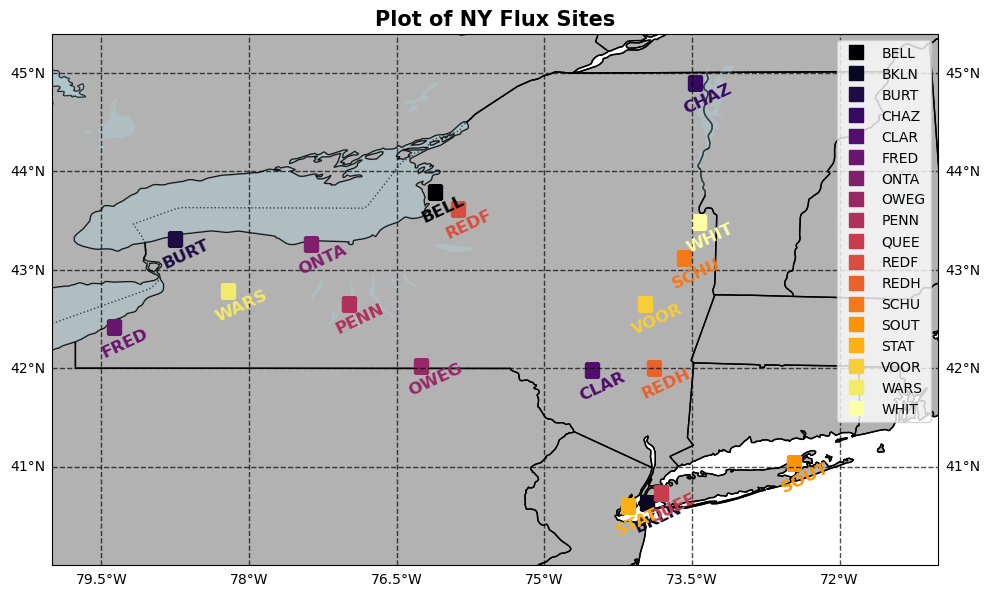

In [9]:
# PLOT ALL SITES
fig=plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle='-')
ax.add_feature(cfeature.LAND, facecolor='black',alpha=0.3)
ax.add_feature(cfeature.LAKES, facecolor='lightblue', alpha=0.3)

cmap = cm.get_cmap('inferno', len(sites))

for i,site in enumerate(sites):
    lon=df_temp.loc[df_temp['site ID'] == site]['longitude'].unique()
    lat=df_temp.loc[df_temp['site ID']== site]['latitude'].unique()
    ax.plot(lon, lat, 's',markersize=10, color=cmap(i), label=f'{site[5::]}')
    ax.text(lon-0.15,lat-0.3,f'{site[5::]}', rotation=25, color=cmap(i),fontweight='bold', fontsize=12)

gl = ax.gridlines(draw_labels=True,linewidth=1, color='black', alpha=0.7, linestyle='--')
gl.top_labels = False
ax.set_extent([-80, -71, 40, 45.4])  
ax.legend(loc='upper right')
ax.set_title('Plot of NY Flux Sites', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig('PART1_sites.png',dpi=300)

In [10]:
# extract basic site name
suffix = [site.split("_")[1] for site in sites]
suffix

['BELL',
 'BKLN',
 'BURT',
 'CHAZ',
 'CLAR',
 'FRED',
 'ONTA',
 'OWEG',
 'PENN',
 'QUEE',
 'REDF',
 'REDH',
 'SCHU',
 'SOUT',
 'STAT',
 'VOOR',
 'WARS',
 'WHIT']

In [11]:
# READ IN STANDARD SITE DATA - only extract data
df_standard = pd.read_csv('/home/jovyan/Desktop/Micrometeorology/DATA/NYSMesonet_standard_2023-06_06-07.csv')
df_standard = df_standard.loc[df_standard['station'].isin(suffix)]
# df_standard.station.unique()

# average for the hour
df_standard['time']=pd.to_datetime(df_standard['time'])
df_standard['day']=df_standard['time'].dt.date
df_standard['hour']=df_standard['time'].dt.hour
df_standard['time']=df_standard['time'].dt.strftime('%Y-%m-%d %H:%M')


df_standard=df_standard.groupby(['station','day', 'hour'],as_index=False).mean(numeric_only=True)
df_standard['datetime']=pd.to_datetime(df_standard['day'].astype(str) + ' ' + df_standard['hour'].astype(str).str.zfill(2) +':00')
df_standard=df_standard.loc[(df_standard['datetime'] >= '2023-06-06 18:00') & (df_standard['datetime'] <= '2023-06-07 18:00')]
df_standard['datetime'] = pd.to_datetime(df_standard['datetime'])
df_standard.station.unique()

array(['BELL', 'BKLN', 'BURT', 'CHAZ', 'CLAR', 'FRED', 'ONTA', 'OWEG',
       'PENN', 'QUEE', 'REDF', 'REDH', 'SCHU', 'SOUT', 'STAT', 'VOOR',
       'WARS', 'WHIT'], dtype=object)

# SURFACE CALCULATIONS: CALCULATE HG
Equation is $H_G = H_{6cm} + C_s \Delta z_A \frac{δT_{SFC}}{δt} + C_s \Delta z_B \frac{δT_{5cm}}{δt}$ </p>

In [12]:
# read in soil data
df_soil = pd.read_csv('/home/jovyan/Desktop/Micrometeorology/DATA/soil_2023-06_06-07.csv')
# list standard sites
standard_sites=df_soil['station'].unique()
standard_sites

# list flux sites
flux_sites = ['FLUX_BELL','FLUX_BKLN','FLUX_BURT','FLUX_CHAZ','FLUX_CLAR','FLUX_FRED','FLUX_ONTA','FLUX_OWEG','FLUX_PENN','FLUX_QUEE','FLUX_REDF','FLUX_REDH','FLUX_SCHU','FLUX_SOUT','FLUX_STAT','FLUX_VOOR','FLUX_WARS','FLUX_WHIT']
suffix = [site.split("_")[1] for site in flux_sites]

# if station is in suffix, then keep
df_soil=df_soil.loc[df_soil['station'].isin(suffix)]
df_soil['datetime']=pd.to_datetime(df_soil['time'])
df_soil['datetime']=df_soil['datetime'].dt.tz_localize(None) # remove +00..
df_soil['hour'], df_soil['minute']=df_soil['datetime'].dt.hour, df_soil['datetime'].dt.minute
df_soil['day'] = df_soil['datetime'].dt.day
df_soil=df_soil.loc[(df_soil['datetime'] >= '2023-06-06 18:00') & (df_soil['datetime'] <= '2023-06-07 18:30')]
df_soil=df_soil.loc[(df_soil['minute']==0) | (df_soil['minute']==30)]

# read in flux data for RL (LW_OUT)
df_RL = pd.read_csv('/home/jovyan/Desktop/Micrometeorology/DATA/new_flux_pblh.csv')

df_RL['stid']=df_RL['stid'].str.split("_").str[1]
df_RL = df_RL.rename(columns={'stid':'station'})
df_RL['datetime']=pd.to_datetime(df_RL['datetime'])
df_RL['day'], df_RL['hour'], df_RL['minute'] = df_RL['datetime'].dt.day, df_RL['datetime'].dt.hour, df_RL['datetime'].dt.minute
df_RL=df_RL.loc[(df_RL['datetime'] >= '2023-06-06 18:00') & (df_RL['datetime'] <= '2023-06-07 18:30')]
df_RL['G_6cm'] = df_RL[['G_HFP01_1','G_HFP01_2', 'G_HFP01_3','G_HFP01_4']].astype(float).mean(axis=1)

# merge on station and datetime
df_HG = pd.merge(
    df_soil,
    df_RL[['station','datetime','LW_OUT','G_6cm']],  # only keep relevant columns
    on=['station','datetime'],
    how='left'  # keep all soil rows, add RL fluxes where available
)

# # make a new df for simplicity, only picking a few values out
HG = {
    'site ID': df_HG['station'].values,
    'datetime': df_HG['datetime'].values,
    'day': df_HG['day'].values,
    'minute': df_HG['minute'].values,
    'hour': df_HG['hour'].values,
    'soil_moisture_5cm': df_HG['soil_moisture_05cm [m^3/m^3]'].values,
    'soil_temp_5cm': df_HG['soil_temp_05cm [degC]'].values,
    'LW_OUT': df_HG['LW_OUT'].values,
    'G_6cm': df_HG['G_6cm'].values
}
HG_df = pd.DataFrame(HG)
# df_HG.to_csv('HG.csv',index=False)
# print(df_RL.loc[df_RL['stid']=='CLAR']['G_6cm'])
HG_df

,site ID,datetime,day,minute,hour,soil_moisture_5cm,soil_temp_5cm,LW_OUT,G_6cm
0,BELL,2023-06-06 18:00:00,6,0,18,0.11,15.2,445.3747,6.569613
1,BELL,2023-06-06 18:30:00,6,30,18,0.12,15.3,452.6346,8.920643
2,BELL,2023-06-06 19:00:00,6,0,19,0.11,15.5,451.0750,10.935589
3,BELL,2023-06-06 19:30:00,6,30,19,0.11,15.7,435.6027,11.601428
4,BELL,2023-06-06 20:00:00,6,0,20,0.12,15.8,421.7077,10.703818
...,...,...,...,...,...,...,...,...,...
895,WHIT,2023-06-07 16:30:00,7,30,16,0.20,14.4,400.2766,3.628367
896,WHIT,2023-06-07 17:00:00,7,0,17,0.21,14.5,391.5697,4.147400
897,WHIT,2023-06-07 17:30:00,7,30,17,0.20,14.4,398.4298,3.541569
898,WHIT,2023-06-07 18:00:00,7,0,18,0.21,14.6,405.1428,3.990192


In [13]:
# declare constant values
    # Cs = (phi_m)(rho_m)(c_m) + (theta)(rho_w)(c_w) + (phi_0)(rho_0)(c_0)
phi_m=0.45 # m3/m3
rho_m=2650 # kg/m3
c_m=870 # J/(kg K)
Cs_1 = phi_m*rho_m*c_m

# theta: pulled from 00; find site's 00 value of soil_moisture_05 cm [m^3/m^3]
rho_w=999.7 # kg/m3
c_w=4192 # J/(kg K)

phi_0=0.05 # m3/3
rho_0=1300 # kg/3
c_0=1920 # J/(kg K)
Cs_3 = phi_0*rho_0*c_0
sec=3600

# R_L_00: pull from flux where minute == 0
# R_L_30: pull from flux where minute == 30
# soil_temp_00: pull from soil where minute == 0
# soil_temp_30: pull from soil where minute == 30
zA, zB = 0.01, 0.05 # m = 1 cm
emissivity = 0.98
stefan = (5.67e8) # W/(m2 K4)
stefan

567000000.0

In [14]:
# create empty dictionary
HG_dict = {
    'site ID': [],
    'datetime': [],
    'HG': []
}

# for each day (6 and 7), for hour in 24 hours, for each site, calculate HG
days = HG_df['day'].unique()
sites = HG_df['site ID'].unique()

for day in days:
    # set valid hours depending on the day
    if day == 6:
        hours = list(range(18, 24))  # 18,19,20,21,22,23
    elif day == 7:
        hours = list(range(0, 19))   # 0 through 18
    else:
        continue  # skip other days if any

    for hour in hours:
        for site in sites:    
            # select the data
            df_hg = HG_df.loc[(HG_df['site ID'] == site) & (HG_df['day'] == day) & (HG_df['hour'] == hour)]
            # print(df_temp.iloc[0]) # corresponds to the hour (00)
            # print(df_temp.iloc[1]) # corresponds to half past the hour (30)
            if df_hg.empty:
                print(f"No data for {site} day {day} hour {hour}")
                continue  
                
            if len(df_hg) < 2:
                print(f"Skipping {site} day {day} hour {hour} — no value for minute 30")
                continue  # need both 0-min and 30-min rows

            # divide up into parts
            p1 = df_hg['G_6cm'].iloc[0]

            theta = df_hg['soil_moisture_5cm'].iloc[0]
            p2 = Cs_1 + ((theta)*(rho_w)*(c_w)) + Cs_3 # Cs

            p3 = zA

        
            RL_30 = df_hg['LW_OUT'].iloc[1]
            RL_00 = df_hg['LW_OUT'].iloc[0]
            p_4_30 = ((RL_30)/(emissivity*stefan))**(0.25)
            p_4_00 = ((RL_00)/(emissivity*stefan))**(0.25)
            p4 = (p_4_30 - p_4_00)/sec

            p5 = zB

            p_6_30 = df_hg['soil_temp_5cm'].iloc[1]+273.15 # convert from C to K
            p_6_00 = df_hg['soil_temp_5cm'].iloc[0]+273.15 # convert from C to K
            p6 = (p_6_30 - p_6_00)/sec
            
            Hg = p1 + p2*p3*p4 + p2*p5*p6

            HG_dict['site ID'].append(site)
            HG_dict['datetime'].append(df_hg['datetime'].iloc[0])  # use 0-min row
            HG_dict['HG'].append(Hg)

# convert dictionary to DataFrame
df_HG = pd.DataFrame(HG_dict)

# map lats and lons to sites
lat_vals=[43.78962, 40.63176, 43.31699, 44.89565, 41.9792, 
     42.41817, 43.25941, 42.02571, 42.65578, 40.73434,
     43.62218, 42.00168, 43.11700, 41.04018, 40.60401,
     42.65242, 42.77993, 43.48507]
lon_vals=[-76.11373, -73.95368, -78.74903, -73.46461, -74.5171,
    -79.3666, -77.37331, -76.25543, -76.98746, -73.81586,
    -75.87769, -73.88391, -73.57828, -72.46586, -74.1485,
    -73.97562, -78.20889, -73.42307]
lats = {
    'BELL': lat_vals[0],
    'BKLN': lat_vals[1],
    'BURT': lat_vals[2],
    'CHAZ': lat_vals[3],
    'CLAR': lat_vals[4],
    'FRED': lat_vals[5],
    'ONTA': lat_vals[6],
    'OWEG': lat_vals[7],
    'PENN': lat_vals[8],
    'QUEE': lat_vals[9],
    'REDF': lat_vals[10],
    'REDH': lat_vals[11],
    'SCHU': lat_vals[12],
    'SOUT': lat_vals[13],
    'STAT': lat_vals[14],
    'VOOR': lat_vals[15],
    'WARS': lat_vals[16],
    'WHIT': lat_vals[17]
}
lons = {
    'BELL': lon_vals[0],
    'BKLN': lon_vals[1],
    'BURT': lon_vals[2],
    'CHAZ': lon_vals[3],
    'CLAR': lon_vals[4],
    'FRED': lon_vals[5],
    'ONTA': lon_vals[6],
    'OWEG': lon_vals[7],
    'PENN': lon_vals[8],
    'QUEE': lon_vals[9],
    'REDF': lon_vals[10],
    'REDH': lon_vals[11],
    'SCHU': lon_vals[12],
    'SOUT': lon_vals[13],
    'STAT': lon_vals[14],
    'VOOR': lon_vals[15],
    'WARS': lon_vals[16],
    'WHIT': lon_vals[17]
}
df_HG['latitude'] = df_HG['site ID'].map(lats)
df_HG['longitude'] = df_HG['site ID'].map(lons)

df_HG['site ID'] = 'FLUX_' + df_HG['site ID']
df_HG

,site ID,datetime,HG,latitude,longitude
0,FLUX_BELL,2023-06-06 18:00:00,8.824683,43.78962,-76.11373
1,FLUX_BKLN,2023-06-06 18:00:00,NaN,40.63176,-73.95368
2,FLUX_BURT,2023-06-06 18:00:00,26.206143,43.31699,-78.74903
3,FLUX_CHAZ,2023-06-06 18:00:00,20.685803,44.89565,-73.46461
4,FLUX_CLAR,2023-06-06 18:00:00,32.254504,41.97920,-74.51710
...,...,...,...,...,...
445,FLUX_SOUT,2023-06-07 18:00:00,28.040927,41.04018,-72.46586
446,FLUX_STAT,2023-06-07 18:00:00,NaN,40.60401,-74.14850
447,FLUX_VOOR,2023-06-07 18:00:00,10.443568,42.65242,-73.97562
448,FLUX_WARS,2023-06-07 18:00:00,21.182742,42.77993,-78.20889


In [15]:
# reframe above code:
# drop where min = 30
df_temp=df_temp.loc[df_temp['minute'] != '30'].copy()

In [16]:
# add HG calculated values back to df_temp
df_temp = df_temp.merge(
    df_HG[['site ID', 'datetime', 'HG']], 
    on=['site ID', 'datetime'], 
    how='left'  # keeps all rows in df_main
)
df_temp

,site ID,datetime,CO2 Flux,FC_QC,HL,LE_QC,ET,ET_QC,H,H_QC,...,G_HFP01_3,G_HFP01_4,day,hour,minute,hr:min,date,latitude,longitude,HG
0,FLUX_BELL,2023-06-06 18:00:00,-7.046453,3.0,135.03420,3.0,0.197696,3.0,181.80530,3.0,...,7.63372,6.037579,2023-06-06,18,00,18:00,2023-06-06 18:00,43.78962,-76.11373,8.824683
1,FLUX_BELL,2023-06-06 19:00:00,-4.211792,5.0,161.81010,5.0,0.237091,5.0,148.91790,5.0,...,12.21734,9.453875,2023-06-06,19,00,19:00,2023-06-06 19:00,43.78962,-76.11373,15.443459
2,FLUX_BELL,2023-06-06 20:00:00,-6.569906,3.0,75.76160,3.0,0.110717,3.0,109.63550,3.0,...,9.27245,9.833431,2023-06-06,20,00,20:00,2023-06-06 20:00,43.78962,-76.11373,10.703946
3,FLUX_BELL,2023-06-06 21:00:00,-6.150500,3.0,69.49164,3.0,0.101670,3.0,72.49127,3.0,...,7.615108,8.051737,2023-06-06,21,00,21:00,2023-06-06 21:00,43.78962,-76.11373,8.776853
4,FLUX_BELL,2023-06-06 22:00:00,-3.222755,8.0,156.85410,8.0,0.229847,8.0,-21.13356,8.0,...,7.632132,7.404489,2023-06-06,22,00,22:00,2023-06-06 22:00,43.78962,-76.11373,10.499402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,FLUX_WHIT,2023-06-07 14:00:00,-4.013032,4.0,23.22082,3.0,0.033819,3.0,20.05956,3.0,...,-0.92011,-1.330963,2023-06-07,14,00,14:00,2023-06-07 14:00,43.48507,-73.42307,1.873357
446,FLUX_WHIT,2023-06-07 15:00:00,-4.380591,4.0,75.70560,3.0,0.110360,3.0,51.20484,3.0,...,3.262015,-0.115552,2023-06-07,15,00,15:00,2023-06-07 15:00,43.48507,-73.42307,6.793270
447,FLUX_WHIT,2023-06-07 16:00:00,-5.126949,2.0,58.69299,1.0,0.085605,1.0,44.97598,1.0,...,5.779876,1.487332,2023-06-07,16,00,16:00,2023-06-07 16:00,43.48507,-73.42307,2.872076
448,FLUX_WHIT,2023-06-07 17:00:00,-1.770288,5.0,12.26690,5.0,0.017892,5.0,11.64250,5.0,...,7.823951,2.515430,2023-06-07,17,00,17:00,2023-06-07 17:00,43.48507,-73.42307,1.311545


# SURFACE CALCULATIONS: CALCULATE RESIDUAL TERM

In [17]:
df_temp['residual'] = df_temp['Rn'].astype(float) - ( df_temp['H'].astype(float) + df_temp['HL'].astype(float) + df_temp['HG'].astype(float) )
df_temp

,site ID,datetime,CO2 Flux,FC_QC,HL,LE_QC,ET,ET_QC,H,H_QC,...,G_HFP01_4,day,hour,minute,hr:min,date,latitude,longitude,HG,residual
0,FLUX_BELL,2023-06-06 18:00:00,-7.046453,3.0,135.03420,3.0,0.197696,3.0,181.80530,3.0,...,6.037579,2023-06-06,18,00,18:00,2023-06-06 18:00,43.78962,-76.11373,8.824683,51.177817
1,FLUX_BELL,2023-06-06 19:00:00,-4.211792,5.0,161.81010,5.0,0.237091,5.0,148.91790,5.0,...,9.453875,2023-06-06,19,00,19:00,2023-06-06 19:00,43.78962,-76.11373,15.443459,45.071441
2,FLUX_BELL,2023-06-06 20:00:00,-6.569906,3.0,75.76160,3.0,0.110717,3.0,109.63550,3.0,...,9.833431,2023-06-06,20,00,20:00,2023-06-06 20:00,43.78962,-76.11373,10.703946,45.202054
3,FLUX_BELL,2023-06-06 21:00:00,-6.150500,3.0,69.49164,3.0,0.101670,3.0,72.49127,3.0,...,8.051737,2023-06-06,21,00,21:00,2023-06-06 21:00,43.78962,-76.11373,8.776853,50.767837
4,FLUX_BELL,2023-06-06 22:00:00,-3.222755,8.0,156.85410,8.0,0.229847,8.0,-21.13356,8.0,...,7.404489,2023-06-06,22,00,22:00,2023-06-06 22:00,43.78962,-76.11373,10.499402,-20.615842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,FLUX_WHIT,2023-06-07 14:00:00,-4.013032,4.0,23.22082,3.0,0.033819,3.0,20.05956,3.0,...,-1.330963,2023-06-07,14,00,14:00,2023-06-07 14:00,43.48507,-73.42307,1.873357,39.740973
446,FLUX_WHIT,2023-06-07 15:00:00,-4.380591,4.0,75.70560,3.0,0.110360,3.0,51.20484,3.0,...,-0.115552,2023-06-07,15,00,15:00,2023-06-07 15:00,43.48507,-73.42307,6.793270,7.833390
447,FLUX_WHIT,2023-06-07 16:00:00,-5.126949,2.0,58.69299,1.0,0.085605,1.0,44.97598,1.0,...,1.487332,2023-06-07,16,00,16:00,2023-06-07 16:00,43.48507,-73.42307,2.872076,58.491554
448,FLUX_WHIT,2023-06-07 17:00:00,-1.770288,5.0,12.26690,5.0,0.017892,5.0,11.64250,5.0,...,2.515430,2023-06-07,17,00,17:00,2023-06-07 17:00,43.48507,-73.42307,1.311545,36.349355


# HRRR and NYS Mesonet Plots - Line Plots
Examining 5 sites: Main site of interest is OWEG site. 4 other sites are PENN, CLAR, ONTA, and WARS

In [18]:
# find where time =! 30 and data for specified sites
df_temp=df_temp.loc[df_temp['minute'] != '30'].copy()
df_2 = df_temp.loc[df_temp['site ID'].isin(['FLUX_OWEG', 'FLUX_PENN', 'FLUX_CLAR', 'FLUX_ONTA', 'FLUX_WARS'])] # for flux data
df_temp2 = df_standard.loc[df_standard['station'].isin(['OWEG', 'PENN', 'CLAR', 'ONTA', 'WARS'])] # for standard site data

In [19]:
# specifications for loop
savepath='/home/jovyan/Desktop/Micrometeorology/deliv4_P2/' # need to specify folder to save to in the loop
vois = ['SHTFL', 'LHTFL', 'USWRF', 'DSWRF', 'ULWRF', 'DLWRF', 'GFLUX',\
        'TMP', 'DPT', 'UGRD', 'VGRD','WIND'] # used for HRRR data 
# for T, Td, U/VGRD, SPD, you need to specify level, so be careful
units = ['W m$^{-2}$','W m$^{-2}$','W m$^{-2}$','W m$^{-2}$','W m$^{-2}$','W m$^{-2}$', 'W m$^{-2}$',\
         '$^{o}$C','$^{o}$C','m s$^{-1}$','m s$^{-1}$','m s$^{-1}$']

titles=['Sensible Heat Flux','Latent Heat Flux', 'Outgoing Shortwave Radiation', 'Incoming Shortwave Radiation', 'Outgoing Longwave Radiation', 'Incoming Longwave Radiation', 'Ground Heat Flux',\
        'Temperature', 'Dewpoint Temperature', 'U-Component of Wind', 'V-Component of Wind', 'Wind Speed']

voi_df2=['H','HL','SW_OUT','SW_IN','LW_OUT','LW_IN', 'HG',\
        'temp_2m [degC]', 'dewpoint [degC]', 'wind_direction_merge [degrees]', 'avg_wind_speed_merge [m/s]'] # corresponds to NYS Mesonet data

# get corresponding NYS Mesonet data
times=df_temp['datetime'].values.copy() 

# set 1 initialization time and forecast 24 hours from there. so start this as an initialized time of 2023-05-18. forecast 24 hours until you reach hour 48, 18Z on 7th
mesonet_hours=df_2['datetime'].unique()
for_init_time='2023-06-05 18:00'
forecast_hrs = list(range(24,49))

In [20]:
# get sitenames and forecast hours
sites = df_2['site ID'].unique()
forecast_hours = forecast_hrs
# create an array for model data
model_data = []

for fxx in forecast_hours:
    hrrr = Herbie(for_init_time, model='hrrr', fxx=fxx)
    hrrr.download()
    
    for site in sites:
        target_lat = df_temp.loc[df_temp['site ID'] == site, 'latitude'].values[0]
        target_lon = df_temp.loc[df_temp['site ID'] == site, 'longitude'].values[0]
        if target_lon < 0:
            target_lon = target_lon % 360
        
        row = {'site': site, 'forecast_hour': fxx}
        
        # Extract each variable
        data_arrays = {}
        for v in vois:
            inventory = hrrr.inventory(v)
            if len(inventory) == 0:
                data_arrays[v] = np.nan
                continue  # skip missing VOIs
            
            # Handle specific VOIs differently
            if v in ['TMP', 'DPT']:
                hrrr_data = hrrr.xarray(inventory['search_this'].iloc[-1])
                # Convert from K to °C
                var_name = list(hrrr_data.data_vars)[0]
                da = hrrr_data[var_name] - 273.15
            else:
                hrrr_data = hrrr.xarray(inventory['search_this'].iloc[0])
                var_name = list(hrrr_data.data_vars)[0]
                da = hrrr_data[var_name]
            
            # Find nearest grid point
            distances = (hrrr_data['latitude'] - target_lat)**2 + (hrrr_data['longitude'] - target_lon)**2
            y, x = np.unravel_index(np.argmin(distances.values), distances.shape)
            data_arrays[v] = da.isel(y=y, x=x).item()
        
        # Add all VOIs to the row
        for v in vois:
            row[v] = data_arrays.get(v, np.nan)
        
        # Compute RN = SHTFL + LHTFL + GRDFLX
        row['SHTFL'] = data_arrays.get('SHTFL', np.nan)
        row['LHTFL'] = data_arrays.get('LHTFL', np.nan)
        row['GFLUX'] = data_arrays.get('GFLUX', np.nan)
        row['USWRF'] = data_arrays.get('USWRF', np.nan)
        row['DSWRF'] = data_arrays.get('DSWRF', np.nan)
        row['ULWRF'] = data_arrays.get('ULWRF', np.nan)
        row['DLWRF'] = data_arrays.get('DLWRF', np.nan)
        row['HPBL'] = data_arrays.get('HPBL', np.nan)
        row['RN_SFCBUDGET'] = sum([data_arrays.get(v, 0) for v in ['SHTFL', 'LHTFL', 'GFLUX'] if not np.isnan(data_arrays.get(v, np.nan))])
        row['RN_RAD'] = sum([data_arrays.get(v, 0) for v in ['USWRF', 'DSWRF', 'ULWRF', 'DLWRF'] if not np.isnan(data_arrays.get(v, np.nan))])
        row['WIND'] = data_arrays.get('WIND', np.nan)
        row['U'] = data_arrays.get('UGRD', np.nan)
        row['V'] = data_arrays.get('VGRD', np.nan)
        row['TMP'] = data_arrays.get('TMP', np.nan)
        row['DPT'] = data_arrays.get('DPT', np.nan)

        model_data.append(row)

# Convert to DataFrame
model_df = pd.DataFrame(model_data)

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jun-05 18:00 UTC F24 ┊ GRIB2 @ local ┊ IDX @ local


/srv/conda/envs/notebook/lib/python3.11/site-packages/herbie/core.py:1280: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")
/srv/conda/envs/notebook/lib/python3.11/site-packages/herbie/core.py:1280: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")
/srv/conda/envs/notebook/lib/python3.11/site-packages/herbie/core.py:1280: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")
/srv/conda/envs/notebook/lib/python3.11/site-packages/herbie/core.py:1280: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")
/srv/conda/envs/notebook/lib/python3.11/site-packages/herbie/core.py:1280: UserWarning: Will not remove GRIB file be

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jun-05 18:00 UTC F25 ┊ GRIB2 @ local ┊ IDX @ local


/srv/conda/envs/notebook/lib/python3.11/site-packages/herbie/core.py:1280: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")
/srv/conda/envs/notebook/lib/python3.11/site-packages/herbie/core.py:1280: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")
/srv/conda/envs/notebook/lib/python3.11/site-packages/herbie/core.py:1280: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")
/srv/conda/envs/notebook/lib/python3.11/site-packages/herbie/core.py:1280: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")
/srv/conda/envs/notebook/lib/python3.11/site-packages/herbie/core.py:1280: UserWarning: Will not remove GRIB file be

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jun-05 18:00 UTC F26 ┊ GRIB2 @ local ┊ IDX @ local
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jun-05 18:00 UTC F27 ┊ GRIB2 @ local ┊ IDX @ local


/srv/conda/envs/notebook/lib/python3.11/site-packages/herbie/core.py:1280: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")
/srv/conda/envs/notebook/lib/python3.11/site-packages/herbie/core.py:1280: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")
/srv/conda/envs/notebook/lib/python3.11/site-packages/herbie/core.py:1280: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")
/srv/conda/envs/notebook/lib/python3.11/site-packages/herbie/core.py:1280: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")
/srv/conda/envs/notebook/lib/python3.11/site-packages/herbie/core.py:1280: UserWarning: Will not remove GRIB file be

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jun-05 18:00 UTC F28 ┊ GRIB2 @ local ┊ IDX @ local
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jun-05 18:00 UTC F29 ┊ GRIB2 @ local ┊ IDX @ local
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jun-05 18:00 UTC F30 ┊ GRIB2 @ local ┊ IDX @ local
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jun-05 18:00 UTC F31 ┊ GRIB2 @ local ┊ IDX @ local
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jun-05 18:00 UTC F32 ┊ GRIB2 @ local ┊ IDX @ local
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jun-05 18:00 UTC F33 ┊ GRIB2 @ local ┊ IDX @ local
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jun-05 18:00 UTC F34 ┊ GRIB2 @ local ┊ IDX @ local
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jun-05 18:00 UTC F35 ┊ GRIB2 @ local ┊ IDX @ local
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jun-05 18:00 UTC F36 ┊ GRIB2 @ local ┊ IDX @ local
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jun-05 18:00 UTC F37 ┊ GRIB2 @ local ┊ IDX @ local
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jun-05 18:00 UTC F38 ┊ GRIB2

/srv/conda/envs/notebook/lib/python3.11/site-packages/herbie/core.py:1280: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")
/srv/conda/envs/notebook/lib/python3.11/site-packages/herbie/core.py:1280: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")
/srv/conda/envs/notebook/lib/python3.11/site-packages/herbie/core.py:1280: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")
/srv/conda/envs/notebook/lib/python3.11/site-packages/herbie/core.py:1280: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")
/srv/conda/envs/notebook/lib/python3.11/site-packages/herbie/core.py:1280: UserWarning: Will not remove GRIB file be

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jun-05 18:00 UTC F41 ┊ GRIB2 @ local ┊ IDX @ local
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jun-05 18:00 UTC F42 ┊ GRIB2 @ local ┊ IDX @ local
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jun-05 18:00 UTC F43 ┊ GRIB2 @ local ┊ IDX @ local
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jun-05 18:00 UTC F44 ┊ GRIB2 @ local ┊ IDX @ local
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jun-05 18:00 UTC F45 ┊ GRIB2 @ local ┊ IDX @ local
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jun-05 18:00 UTC F46 ┊ GRIB2 @ local ┊ IDX @ local


/srv/conda/envs/notebook/lib/python3.11/site-packages/herbie/core.py:1280: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")
/srv/conda/envs/notebook/lib/python3.11/site-packages/herbie/core.py:1280: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")
/srv/conda/envs/notebook/lib/python3.11/site-packages/herbie/core.py:1280: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")
/srv/conda/envs/notebook/lib/python3.11/site-packages/herbie/core.py:1280: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")
/srv/conda/envs/notebook/lib/python3.11/site-packages/herbie/core.py:1280: UserWarning: Will not remove GRIB file be

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jun-05 18:00 UTC F47 ┊ GRIB2 @ local ┊ IDX @ local


/srv/conda/envs/notebook/lib/python3.11/site-packages/herbie/core.py:1280: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")
/srv/conda/envs/notebook/lib/python3.11/site-packages/herbie/core.py:1280: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")
/srv/conda/envs/notebook/lib/python3.11/site-packages/herbie/core.py:1280: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")
/srv/conda/envs/notebook/lib/python3.11/site-packages/herbie/core.py:1280: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")
/srv/conda/envs/notebook/lib/python3.11/site-packages/herbie/core.py:1280: UserWarning: Will not remove GRIB file be

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jun-05 18:00 UTC F48 ┊ GRIB2 @ local ┊ IDX @ local


In [21]:
model_df

,site,forecast_hour,SHTFL,LHTFL,USWRF,DSWRF,ULWRF,DLWRF,GFLUX,TMP,DPT,UGRD,VGRD,WIND,HPBL,RN_SFCBUDGET,RN_RAD,U,V
0,FLUX_CLAR,24,226.0,286.0,135.625580,832.0,276.899994,283.899994,-60.0,16.346954,6.111969,23.383118,-6.440422,6.660918,NaN,452.0,1528.425568,23.383118,-6.440422
1,FLUX_ONTA,24,337.0,124.0,115.250587,768.0,275.799988,301.799988,-60.0,18.159454,8.361969,21.883118,-19.502922,4.848418,NaN,401.0,1460.850563,21.883118,-19.502922
2,FLUX_OWEG,24,176.0,70.0,82.625587,456.0,266.600006,307.100006,-20.0,18.471954,6.174469,26.820618,-14.377922,7.598418,NaN,226.0,1112.325600,26.820618,-14.377922
3,FLUX_PENN,24,278.0,73.0,102.625587,605.0,272.100006,321.100006,-40.0,20.909454,6.424469,25.195618,-16.752922,5.910918,NaN,311.0,1300.825600,25.195618,-16.752922
4,FLUX_WARS,24,330.0,187.0,153.375580,861.0,279.600006,290.399994,-60.0,18.659454,4.236969,24.195618,-20.440422,7.348418,NaN,457.0,1584.375580,24.195618,-20.440422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,FLUX_CLAR,48,267.0,189.0,113.966583,699.0,237.000000,336.799988,-60.0,13.785309,5.911163,15.898914,2.277351,5.396506,NaN,396.0,1386.766571,15.898914,2.277351
121,FLUX_ONTA,48,242.0,76.0,70.966583,473.0,190.699997,351.200012,-20.0,16.910309,6.848663,-5.038586,-1.222649,4.646506,NaN,298.0,1085.866592,-5.038586,-1.222649
122,FLUX_OWEG,48,359.0,79.0,136.341583,753.0,261.299988,311.200012,-70.0,16.910309,4.848663,14.336414,1.027351,6.146506,NaN,368.0,1461.841583,14.336414,1.027351
123,FLUX_PENN,48,234.0,52.0,78.591583,464.0,212.199997,362.799988,-40.0,18.222809,4.723663,3.773914,-1.160149,5.959006,NaN,246.0,1117.591568,3.773914,-1.160149


In [22]:
# add station name column and datetime column (strings)
df_temp2['station_flux'] = 'FLUX_' + df_temp2['station'].astype(str)
df_temp2['datetime'] = df_temp2['day'].astype(str) + ' ' + df_temp2['hour'].astype(str) + ':00Z'
df_temp2

/tmp/ipykernel_207/3848208755.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp2['station_flux'] = 'FLUX_' + df_temp2['station'].astype(str)
/tmp/ipykernel_207/3848208755.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp2['datetime'] = df_temp2['day'].astype(str) + ' ' + df_temp2['hour'].astype(str) + ':00Z'


,station,day,hour,latitude [degrees_north],longitude [degrees_east],elevation [m],temp_2m [degC],dewpoint [degC],avg_wind_speed_merge [m/s],max_wind_speed_merge [m/s],wind_speed_stddev_merge [m/s],wind_direction_merge [degrees],wind_direction_stddev_merge [degrees],datetime,station_flux
210,CLAR,2023-06-06,18,41.97920,-74.51710,583.7,17.875000,7.100000,2.433333,5.958333,1.275000,110.666667,52.333333,2023-06-06 18:00Z,FLUX_CLAR
211,CLAR,2023-06-06,19,41.97920,-74.51710,583.7,16.066667,7.300000,2.291667,5.716667,1.200000,91.583333,54.166667,2023-06-06 19:00Z,FLUX_CLAR
212,CLAR,2023-06-06,20,41.97920,-74.51710,583.7,14.566667,7.225000,1.516667,3.816667,0.808333,199.750000,54.916667,2023-06-06 20:00Z,FLUX_CLAR
213,CLAR,2023-06-06,21,41.97920,-74.51710,583.7,14.200000,6.733333,1.900000,4.741667,0.975000,199.666667,60.750000,2023-06-06 21:00Z,FLUX_CLAR
214,CLAR,2023-06-06,22,41.97920,-74.51710,583.7,13.783333,6.841667,1.841667,4.733333,1.025000,236.416667,47.583333,2023-06-06 22:00Z,FLUX_CLAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,WARS,2023-06-07,14,42.77993,-78.20889,540.7,12.100000,4.057143,2.314286,4.528571,0.814286,300.000000,21.857143,2023-06-07 14:00Z,FLUX_WARS
807,WARS,2023-06-07,15,42.77993,-78.20889,540.7,13.300000,3.785714,2.814286,5.685714,1.128571,310.714286,26.428571,2023-06-07 15:00Z,FLUX_WARS
808,WARS,2023-06-07,16,42.77993,-78.20889,540.7,14.700000,3.050000,3.566667,7.025000,1.325000,306.583333,24.416667,2023-06-07 16:00Z,FLUX_WARS
809,WARS,2023-06-07,17,42.77993,-78.20889,540.7,15.808333,0.958333,3.533333,7.741667,1.458333,319.916667,26.666667,2023-06-07 17:00Z,FLUX_WARS


FLUX_CLAR
FLUX_ONTA
FLUX_OWEG
FLUX_PENN
FLUX_WARS


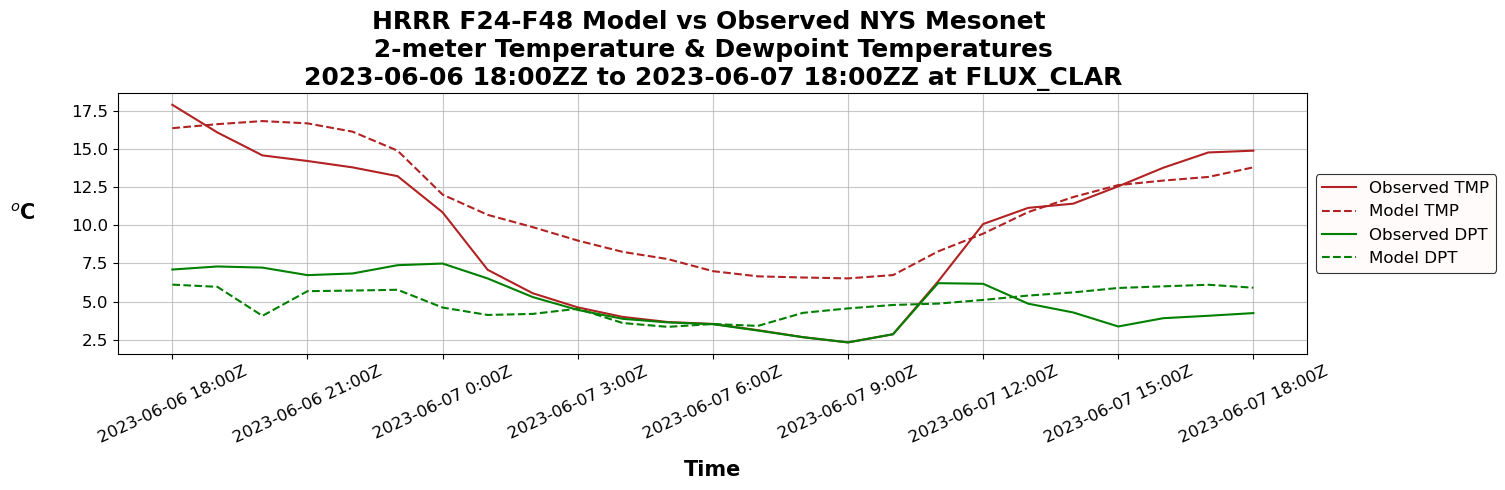

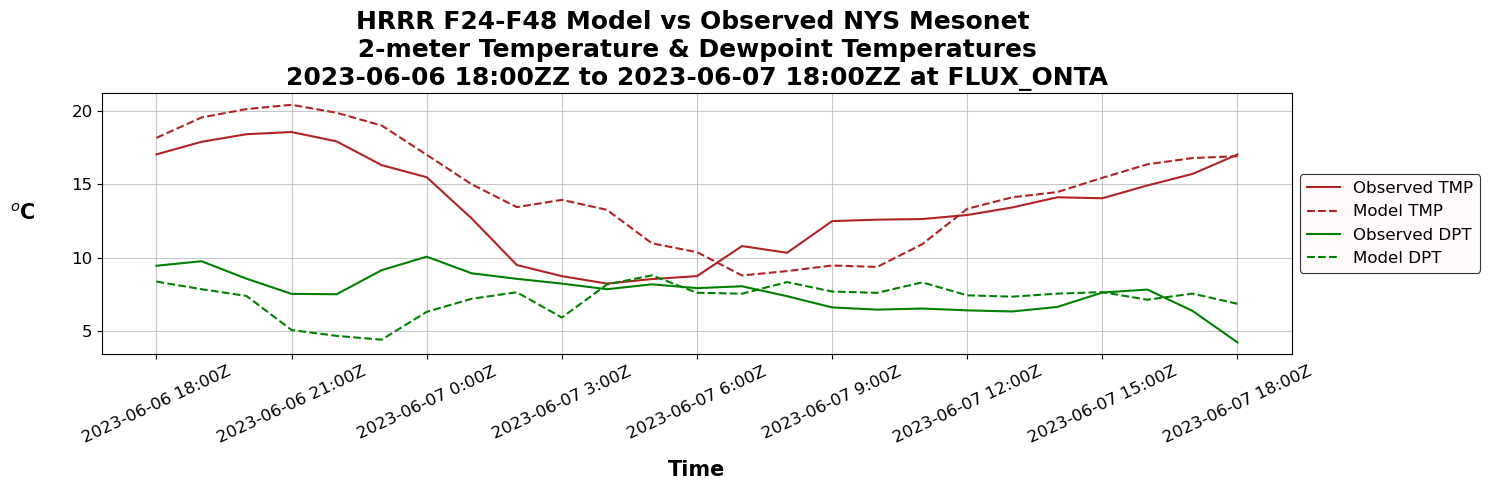

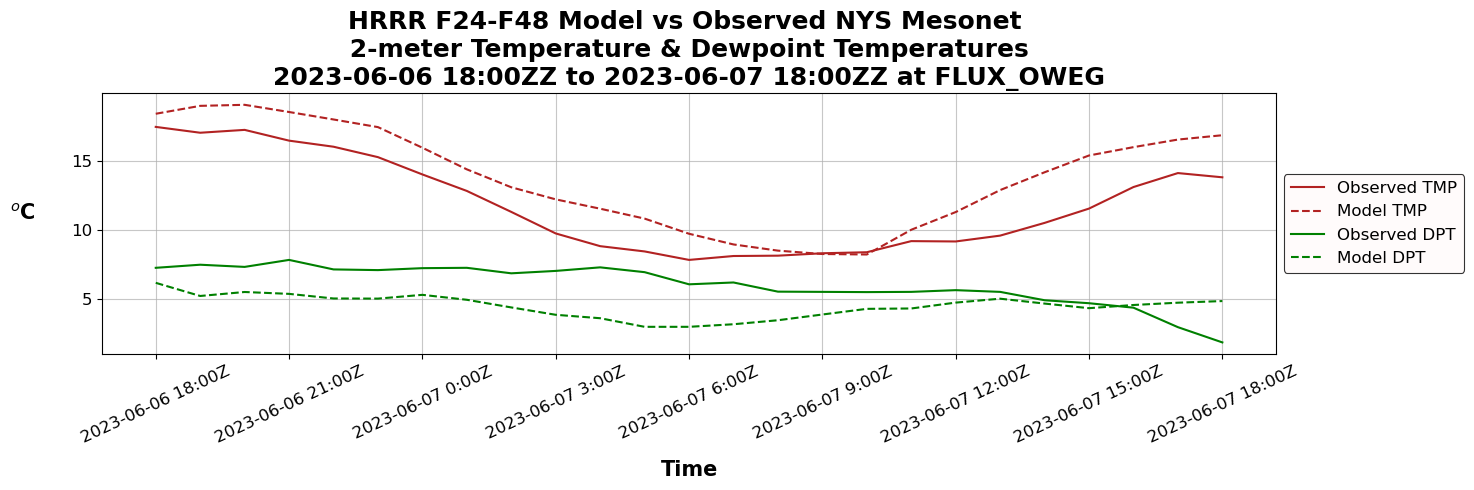

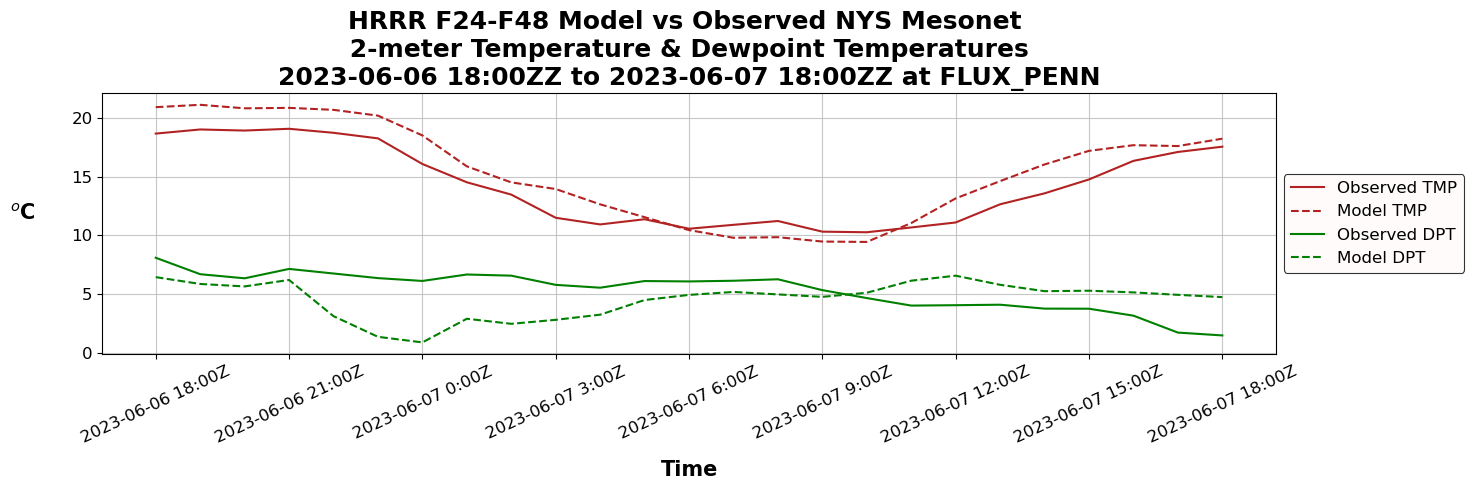

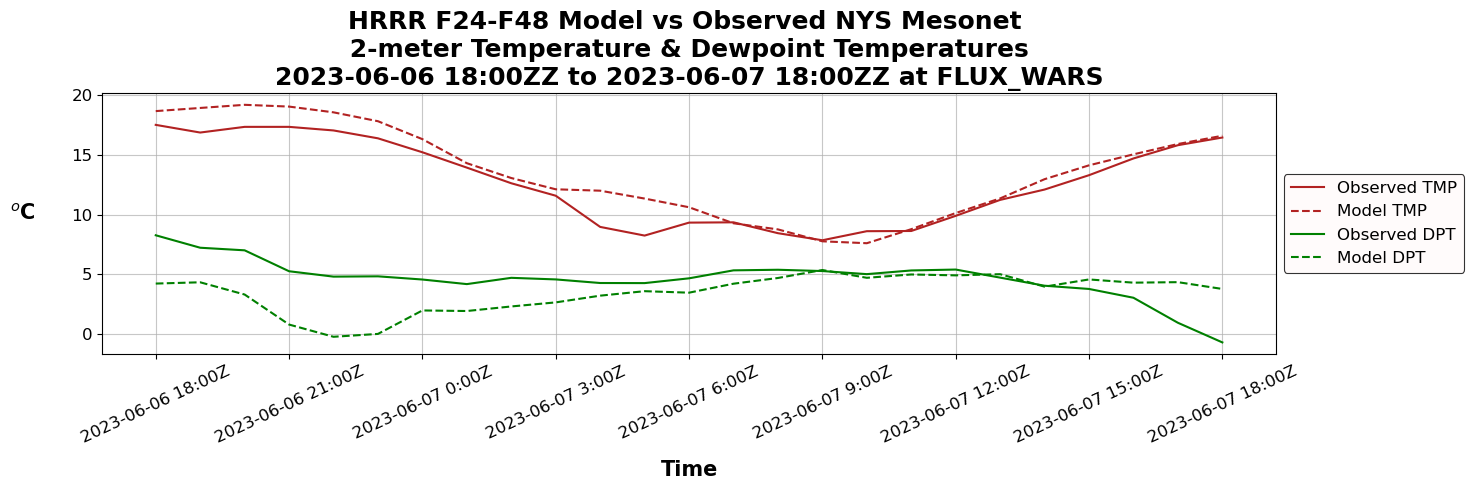

In [23]:
# PLOT THE DATA
name = 'temp' # choose either wind, temp, sfc, or rad

# TMP, DPT, WIND
for i, site in enumerate(sites):
    print(site)
    df_obs = df_temp.loc[df_temp['site ID'] == site]
    df_obs_stand = df_temp2.loc[df_temp2['station_flux'] == site]
    df_mod = model_df.loc[model_df['site']==site]
    
    # TIME
    time = df_obs_stand['datetime'].copy()
    
    # MODEL DATA
    h_mod = df_mod['SHTFL'].copy()
    hl_mod = df_mod['LHTFL'].copy()
    hg_mod = df_mod['GFLUX'].copy()
    rn_mod = h_mod + hl_mod
    usw_mod = df_mod['USWRF'].copy()
    dsw_mod = df_mod['DSWRF'].copy()
    ulw_mod = df_mod['ULWRF'].copy()
    dlw_mod = df_mod['DLWRF'].copy()
    rn_mod_rad = usw_mod + dsw_mod + ulw_mod + dlw_mod
    tmp_mod = df_mod['TMP'].copy()
    dpt_mod = df_mod['DPT'].copy()
    spd_mod = df_mod['WIND'].copy()

    # OBSERVED DATA
    h_obs = df_obs['H'].copy()
    hl_obs = df_obs['HL'].copy()
    hg_obs = df_obs['HG'].copy()
    rn_obs = h_obs + hl_obs
    usw_obs = df_obs['SW_OUT'].copy()
    dsw_obs = df_obs['SW_IN'].copy()
    ulw_obs = df_obs['LW_OUT'].copy()
    dlw_obs = df_obs['LW_IN'].copy()
    rn_obs_rad = usw_obs + dsw_obs + ulw_obs + dlw_obs
    tmp_obs = df_obs_stand['temp_2m [degC]'].copy()
    dpt_obs = df_obs_stand['dewpoint [degC]'].copy()
    spd_obs = df_obs_stand['avg_wind_speed_merge [m/s]'].copy()


    ### PLOTTING ###
    if name == 'wind':
        # Plot
        fig, ax = plt.subplots(figsize=(15,5))
        ax.plot(time, spd_obs, color='darkslategrey', label='Observed Wind Speed')
        ax.plot(time, spd_mod, color='darkslategrey', linestyle='--', label='Model Wind Speed')
    
        ax.set_xticks(time[::3])
        ax.tick_params(axis='x', labelsize=12, rotation=25)
        ax.tick_params(axis='y', labelsize=12)
        
        legend = ax.legend(loc='center left', fontsize=12, bbox_to_anchor=(1, 0.5), frameon=True)
        legend.get_frame().set_edgecolor('black')
        legend.get_frame().set_linewidth(0.8)
        legend.get_frame().set_facecolor('snow')
        
        ax.set_ylabel('m $^{-1}$', fontsize=15, rotation='horizontal', labelpad=35, fontweight='bold')
        ax.set_xlabel('Time', fontsize=15, labelpad=10, fontweight='bold')
        ax.set_title(f'HRRR F{forecast_hrs[0]}-F{forecast_hrs[-1]} Model vs Observed NYS Mesonet \n Wind Speed \n{time.iloc[0]}Z to {time.iloc[-1]}Z at {site}', fontsize=18, fontweight='bold')
        
        ax.grid(True, alpha=0.7)
        plt.tight_layout()
        plt.savefig(f'{savepath}WIND_{site}.png', dpi=300)
    elif name=='temp':
        # Plot
        fig, ax = plt.subplots(figsize=(15,5))
        ax.plot(time, tmp_obs, color='firebrick', label='Observed TMP')
        ax.plot(time, tmp_mod, color='firebrick', linestyle='--', label='Model TMP')
        ax.plot(time, dpt_obs, color='green', label='Observed DPT')
        ax.plot(time, dpt_mod, color='green', linestyle='--', label='Model DPT')
        
        ax.set_xticks(time[::3])
        ax.tick_params(axis='x', labelsize=12, rotation=25)
        ax.tick_params(axis='y', labelsize=12)
        
        legend = ax.legend(loc='center left', fontsize=12, bbox_to_anchor=(1, 0.5), frameon=True)
        legend.get_frame().set_edgecolor('black')
        legend.get_frame().set_linewidth(0.8)
        legend.get_frame().set_facecolor('snow')
        
        ax.set_ylabel('$^{o}$C', fontsize=15, rotation='horizontal', labelpad=35, fontweight='bold')
        ax.set_xlabel('Time', fontsize=15, labelpad=10, fontweight='bold')
        ax.set_title(f'HRRR F{forecast_hrs[0]}-F{forecast_hrs[-1]} Model vs Observed NYS Mesonet \n 2-meter Temperature & Dewpoint Temperatures \n{time.iloc[0]}Z to {time.iloc[-1]}Z at {site}', fontsize=18, fontweight='bold')
        
        ax.grid(True, alpha=0.7)
        plt.tight_layout()
        plt.savefig(f'{savepath}TMPDPT_{site}.png', dpi=300)
    elif name =='sfc':
        # Plot
        fig, ax = plt.subplots(figsize=(15,5))
        ax.plot(time, h_obs, color='red', label='Observed H')
        ax.plot(time, hl_obs, color='navy', label='Observed HL')
        ax.plot(time, hg_obs, color='limegreen', label='Observed HG')
        ax.plot(time, rn_obs, color='plum', label='Observed RN')
        ax.plot(time, h_mod, color='red', linestyle='--', label='Model H')
        ax.plot(time, hl_mod, color='navy', linestyle='--', label='Model HL')
        ax.plot(time, hg_mod, color='limegreen', linestyle='--', label='Model HG')
        ax.plot(time, rn_mod, color='plum', linestyle='--', label='Model RN')
        
        ax.set_xticks(time[::3])
        ax.tick_params(axis='x', labelsize=12, rotation=25)
        ax.tick_params(axis='y', labelsize=12)
        
        legend = ax.legend(loc='center left', fontsize=12, bbox_to_anchor=(1, 0.5), frameon=True)
        legend.get_frame().set_edgecolor('black')
        legend.get_frame().set_linewidth(0.8)
        legend.get_frame().set_facecolor('snow')
        
        ax.set_ylabel('W m$^{-2}$', fontsize=15, rotation='horizontal', labelpad=35, fontweight='bold')
        ax.set_xlabel('Time', fontsize=15, labelpad=10, fontweight='bold')
        ax.set_title(f'HRRR F{forecast_hrs[0]}-F{forecast_hrs[-1]} Model vs Observed NYS Mesonet Surface Energy Budget\n{time.iloc[0]}Z to {time.iloc[-1]}Z at {site}', fontsize=18, fontweight='bold')
        
        ax.grid(True, alpha=0.7)
        plt.tight_layout()
        plt.savefig(f'{savepath}SFCBUD_{site}.png', dpi=300)
    elif name=='rad':
        # Plot
        fig, ax = plt.subplots(figsize=(15,5))
        ax.plot(time, usw_obs, color='forestgreen', label='Observed USWRF')
        ax.plot(time, usw_mod, color='forestgreen', linestyle='--', label='Model USWRF')
        ax.plot(time, dsw_obs, color='darkorange', label='Observed DSWRF')
        ax.plot(time, dsw_mod, color='darkorange', linestyle='--',label='Model DSWRF')
        
        ax.plot(time, ulw_obs, color='dodgerblue', label='Observed ULWRF')
        ax.plot(time, ulw_mod, color='dodgerblue', linestyle='--', label='Model ULWRF')
        ax.plot(time, dlw_obs, color='mediumvioletred', label='Observed DLWRF')
        ax.plot(time, dlw_mod, color='mediumvioletred', linestyle='--',label='Model DLWRF')
        
        ax.plot(time, rn_obs_rad, color='plum', label='Observed RN')
        ax.plot(time, rn_mod_rad, color='plum', linestyle='--', label='Model RN')
        
        ax.set_xticks(time[::3])
        ax.tick_params(axis='x', labelsize=12, rotation=25)
        ax.tick_params(axis='y', labelsize=12)
        
        legend = ax.legend(loc='center left', fontsize=12, bbox_to_anchor=(1, 0.5), frameon=True)
        legend.get_frame().set_edgecolor('black')
        legend.get_frame().set_linewidth(0.8)
        legend.get_frame().set_facecolor('snow')
        
        ax.set_ylabel('W m$^{-2}$', fontsize=15, rotation='horizontal', labelpad=35, fontweight='bold')
        ax.set_xlabel('Time', fontsize=15, labelpad=10, fontweight='bold')
        ax.set_title(f'HRRR F{forecast_hrs[0]}-F{forecast_hrs[-1]} Model vs Observed NYS Mesonet Radiative Energy Budget\n{time.iloc[0]}Z to {time.iloc[-1]}Z at {site}', fontsize=18, fontweight='bold')
        
        ax.grid(True, alpha=0.7)
        plt.tight_layout()
        plt.savefig(f'{savepath}RAD_{site}.png', dpi=300)

## COMPUTE AVERAGE ACROSS SITES SELECTED

In [24]:
df_temp_group = df_temp.groupby(['day','hour']).mean(numeric_only=True)
df_temp_group.reset_index(inplace=True)
df_model_group = model_df.groupby(['forecast_hour']).mean(numeric_only=True)
df_model_group.reset_index(inplace=True)
df_stand_group = df_temp2.groupby(['day','hour']).mean(numeric_only=True)
df_stand_group.reset_index(inplace=True)
df_stand_group['datetime']=df_stand_group['day'].astype(str)+ ' ' + df_stand_group['hour'].astype(str) + ':00Z'
df_model_group['datetime']=df_stand_group['datetime']
df_model_group

,forecast_hour,SHTFL,LHTFL,USWRF,DSWRF,ULWRF,DLWRF,GFLUX,TMP,DPT,UGRD,VGRD,WIND,HPBL,RN_SFCBUDGET,RN_RAD,U,V,datetime
0,24,269.4,148.0,117.900584,704.400000,274.200000,300.859998,-48.0,18.509454,6.261969,24.295618,-15.502922,6.473418,NaN,369.4,1397.360582,24.295618,-15.502922,2023-06-06 18:00Z
1,25,276.0,146.0,119.966281,703.000000,270.179996,311.140002,-46.0,19.047485,5.843353,24.458427,-14.936853,6.200426,NaN,376.0,1404.286279,24.458427,-14.936853,2023-06-06 19:00Z
2,26,224.0,138.0,107.902719,611.200000,274.839996,301.939996,-24.0,19.210577,5.182782,24.343927,-14.690501,6.117074,NaN,338.0,1295.882712,24.343927,-14.690501,2023-06-06 20:00Z
3,27,168.0,124.0,93.210883,504.600000,274.259998,299.019995,-6.0,19.112323,4.621796,23.952969,-14.752334,6.292882,NaN,286.0,1171.090875,23.952969,-14.752334,2023-06-06 21:00Z
4,28,94.0,102.0,69.450233,355.600000,273.940002,295.100006,14.0,18.656396,3.660980,23.717645,-14.907963,6.362170,NaN,210.0,994.090241,23.717645,-14.907963,2023-06-06 22:00Z
5,29,18.0,68.0,41.110064,195.400000,271.079999,293.860004,28.0,17.875732,3.313928,23.211776,-15.108912,6.039028,NaN,114.0,801.450066,23.211776,-15.108912,2023-06-06 23:00Z
6,30,-25.6,32.0,11.125000,48.540000,262.839999,299.460004,50.0,15.963873,3.813312,22.490366,-15.034808,5.393216,NaN,56.4,621.965003,22.490366,-15.034808,2023-06-07 0:00Z
7,31,-31.0,8.0,0.000000,0.000000,262.200003,290.320001,58.0,14.053253,4.216040,22.155526,-14.321515,4.075758,NaN,35.0,552.520004,22.155526,-14.321515,2023-06-07 1:00Z
8,32,-34.8,4.0,0.000000,0.000000,261.160004,284.119995,54.0,12.800061,4.197601,22.436300,-13.019780,3.217623,NaN,23.2,545.279999,22.436300,-13.019780,2023-06-07 2:00Z
9,33,-37.8,6.0,0.000000,0.000000,260.060001,282.059998,50.0,12.245789,3.949792,22.303295,-11.960620,3.255456,NaN,18.2,542.119998,22.303295,-11.960620,2023-06-07 3:00Z


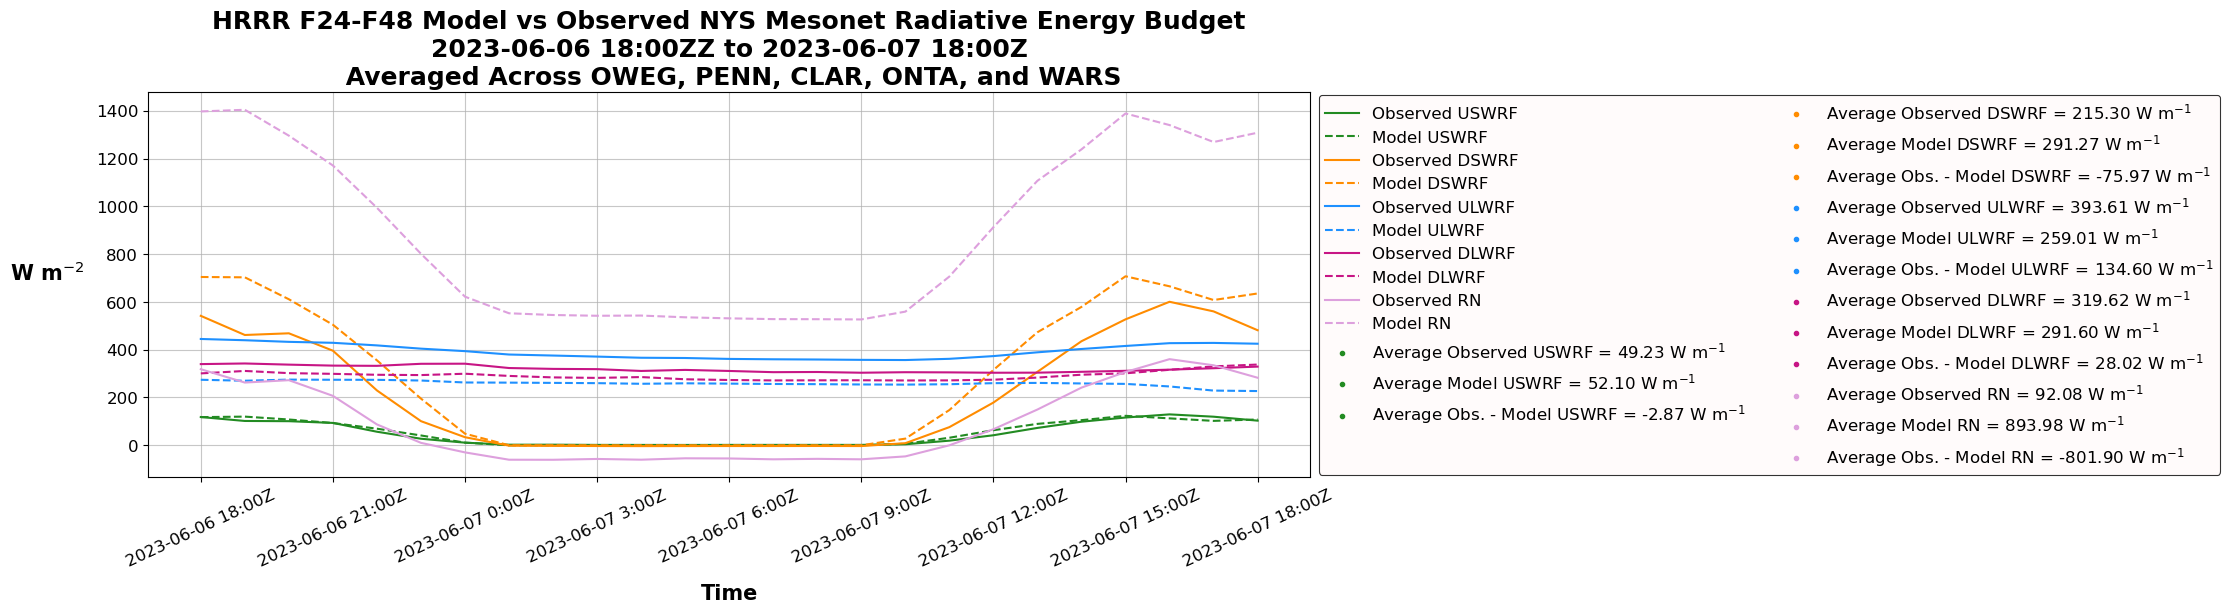

In [25]:
name = 'rad'
time = df_model_group['datetime'].copy()

### PLOTTING ###
if name == 'wind':
    # Plot
    fig, ax = plt.subplots(figsize=(15,5))
    ax.plot(df_model_group['datetime'], df_stand_group['avg_wind_speed_merge [m/s]'], color='darkslategrey', label='Observed Wind Speed')
    ax.plot(df_model_group['datetime'], df_model_group['WIND'], color='darkslategrey', linestyle='--', label='Model Wind Speed')
    average_obs = np.mean(df_stand_group['avg_wind_speed_merge [m/s]'])
    average_model = np.mean(df_model_group['WIND'])
    average_diff = np.mean(df_stand_group['avg_wind_speed_merge [m/s]'] - df_model_group['WIND'])
    ax.scatter([], [], marker = '.', color = 'k', label=f'Average Observed Wind Speed = {average_obs:.2f} m s$^{{-1}}$')
    ax.scatter([], [], marker = '.', color = 'k', label=f'Average Model Wind Speed = {average_model:.2f} m s$^{{-1}}$')
    ax.scatter([], [], marker = '.', color = 'k', label=f'Average Obs. - Model Wind Speed = {average_diff:.2f} m s$^{{-1}}$')

    ax.set_xticks(time[::3])
    ax.tick_params(axis='x', labelsize=12, rotation=25)
    ax.tick_params(axis='y', labelsize=12)
    
    legend = ax.legend(loc='center left', fontsize=12, bbox_to_anchor=(1, 0.5), frameon=True)
    legend.get_frame().set_edgecolor('black')
    legend.get_frame().set_linewidth(0.8)
    legend.get_frame().set_facecolor('snow')
    
    ax.set_ylabel('m s$^{-1}$', fontsize=15, rotation='horizontal', labelpad=35, fontweight='bold')
    ax.set_xlabel('Time', fontsize=15, labelpad=10, fontweight='bold')
    ax.set_title(f'HRRR F{forecast_hrs[0]}-F{forecast_hrs[-1]} Model vs Observed NYS Mesonet Wind Speed \n{time.iloc[0]}Z to {time.iloc[-1]}  \n Averaged Across OWEG, PENN, CLAR, ONTA, and WARS', fontsize=18, fontweight='bold')
    
    ax.grid(True, alpha=0.7)
    plt.tight_layout()
    plt.savefig(f'{savepath}Average_WIND_{site}.png', dpi=300)
    #plt.close()

elif name=='temp':
    # Plot
    fig, ax = plt.subplots(figsize=(15,5))
    ax.plot(df_model_group['datetime'], df_stand_group['temp_2m [degC]'], color='firebrick', label='Observed TMP')
    ax.plot(df_model_group['datetime'], df_model_group['TMP'], color='firebrick', linestyle='--', label='Model TMP')
    ax.plot(df_model_group['datetime'],  df_stand_group['dewpoint [degC]'], color='green', label='Observed DPT')
    ax.plot(df_model_group['datetime'], df_model_group['DPT'], color='green', linestyle='--', label='Model DPT')

    average_obs_T = np.mean(df_stand_group['temp_2m [degC]'])
    average_model_T = np.mean(df_model_group['TMP'])
    average_diff_T = np.mean(df_stand_group['temp_2m [degC]'] - df_model_group['TMP'])
    ax.scatter([], [], marker = '.', color = 'firebrick', label=f'Average Observed Temperature = {average_obs_T:.2f} $^{{o}}C$')
    ax.scatter([], [], marker = '.', color = 'firebrick', label=f'Average Model Temperature = {average_model_T:.2f} $^{{o}}C$')
    ax.scatter([], [], marker = '.', color = 'firebrick', label=f'Average Obs. - Model Temperature = {average_diff_T:.2f} $^{{o}}C$')

    average_obs_Td = np.mean(df_stand_group['dewpoint [degC]'])
    average_model_Td = np.mean(df_model_group['DPT'])
    average_diff_Td = np.mean(df_stand_group['dewpoint [degC]'] - df_model_group['DPT'])
    ax.scatter([], [], marker = '.', color = 'g', label=f'Average Observed Dewpoint = {average_obs_Td:.2f} $^{{o}}C$')
    ax.scatter([], [], marker = '.', color = 'g', label=f'Average Model Dewpoint = {average_model_Td:.2f} $^{{o}}C$')
    ax.scatter([], [], marker = '.', color = 'g', label=f'Average Obs. - Model Dewpoint = {average_diff_Td:.2f} $^{{o}}C$')
    
    
    ax.set_xticks(time[::3])
    ax.tick_params(axis='x', labelsize=12, rotation=25)
    ax.tick_params(axis='y', labelsize=12)
    
    legend = ax.legend(loc='center left', fontsize=12, bbox_to_anchor=(1, 0.5), frameon=True)
    legend.get_frame().set_edgecolor('black')
    legend.get_frame().set_linewidth(0.8)
    legend.get_frame().set_facecolor('snow')
    
    ax.set_ylabel('$^{o}$C', fontsize=15, rotation='horizontal', labelpad=35, fontweight='bold')
    ax.set_xlabel('Time', fontsize=15, labelpad=10, fontweight='bold')
    ax.set_title(f'Average HRRR F{forecast_hrs[0]}-F{forecast_hrs[-1]} Model vs Observed NYS Mesonet \n 2-meter Temperature & Dewpoint Temperatures \n{time.iloc[0]}Z to {time.iloc[-1]} \n Averaged Across OWEG, PENN, CLAR, ONTA, and WARS', fontsize=18, fontweight='bold')
    
    ax.grid(True, alpha=0.7)
    plt.tight_layout()
    plt.savefig(f'{savepath}Average_TMPDPT.png', dpi=300)

elif name =='sfc':
    # Plot
    fig, ax = plt.subplots(figsize=(15,5))
    ax.plot(df_model_group['datetime'], df_temp_group['H'], color='red', label='Observed H')
    ax.plot(df_model_group['datetime'], df_temp_group['HL'], color='navy', label='Observed HL')
    ax.plot(df_model_group['datetime'], df_temp_group['HG'], color='limegreen', label='Observed HG')
    ax.plot(df_model_group['datetime'], df_temp_group['Rn'], color='plum', label='Observed RN')
    ax.plot(df_model_group['datetime'], df_model_group['SHTFL'], color='red', linestyle='--', label='Model H')
    ax.plot(df_model_group['datetime'], df_model_group['LHTFL'], color='navy', linestyle='--', label='Model HL')
    ax.plot(df_model_group['datetime'], df_model_group['GFLUX'], color='limegreen', linestyle='--', label='Model HG')
    ax.plot(df_model_group['datetime'], df_model_group['RN_SFCBUDGET'], color='plum', linestyle='--', label='Model RN')

    average_obs_H = np.mean(df_temp_group['H'])
    average_model_H = np.mean(df_model_group['SHTFL'])
    average_diff_H = np.mean(df_temp_group['H'] - df_model_group['SHTFL'])
    ax.scatter([], [], marker = '.', color = 'red', label=f'Average Observed H = {average_obs_H:.2f} W m$^{{-1}}$')
    ax.scatter([], [], marker = '.', color = 'red', label=f'Average Model H = {average_model_H:.2f} W m$^{{-1}}$')
    ax.scatter([], [], marker = '.', color = 'red', label=f'Average Obs. - Model H = {average_diff_H:.2f} W m$^{{-1}}$')

    average_obs_HL = np.mean(df_temp_group['HL'])
    average_model_HL = np.mean(df_model_group['LHTFL'])
    average_diff_HL = np.mean(df_temp_group['HL'] - df_model_group['LHTFL'])
    ax.scatter([], [], marker = '.', color = 'navy', label=f'Average Observed HL = {average_obs_HL:.2f} W m$^{{-1}}$')
    ax.scatter([], [], marker = '.', color = 'navy', label=f'Average Model HL = {average_model_HL:.2f} W m$^{{-1}}$')
    ax.scatter([], [], marker = '.', color = 'navy', label=f'Average Obs. - Model HL = {average_diff_HL:.2f} W m$^{{-1}}$')
    
    average_obs_HG = np.mean(df_temp_group['HG'])
    average_model_HG = np.mean(df_model_group['GFLUX'])
    average_diff_HG = np.mean(df_temp_group['HG'] - df_model_group['GFLUX'])
    ax.scatter([], [], marker = '.', color = 'limegreen', label=f'Average Observed HG = {average_obs_HG:.2f} W m$^{{-1}}$')
    ax.scatter([], [], marker = '.', color = 'limegreen', label=f'Average Model HG = {average_model_HG:.2f} W m$^{{-1}}$')
    ax.scatter([], [], marker = '.', color = 'limegreen', label=f'Average Obs. - Model HG = {average_diff_HG:.2f} W m$^{{-1}}$')

    average_obs_RN = np.mean(df_temp_group['Rn'])
    average_model_RN = np.mean(df_model_group['RN_SFCBUDGET'])
    average_diff_RN = np.mean(df_temp_group['Rn'] - df_model_group['RN_SFCBUDGET'])
    ax.scatter([], [], marker = '.', color = 'plum', label=f'Average Observed RN = {average_obs_RN:.2f} W m$^{{-1}}$')
    ax.scatter([], [], marker = '.', color = 'plum', label=f'Average Model RN = {average_model_RN:.2f} W m$^{{-1}}$')
    ax.scatter([], [], marker = '.', color = 'plum', label=f'Average Obs. - Model RN = {average_diff_RN:.2f} W m$^{{-1}}$')
    

    
    ax.set_xticks(time[::3])
    ax.tick_params(axis='x', labelsize=12, rotation=25)
    ax.tick_params(axis='y', labelsize=12)
    
    legend = ax.legend(loc='center left', ncol=2, fontsize=12, bbox_to_anchor=(1, 0.5), frameon=True)
    legend.get_frame().set_edgecolor('black')
    legend.get_frame().set_linewidth(0.8)
    legend.get_frame().set_facecolor('snow')
    
    ax.set_ylabel('W m$^{-2}$', fontsize=15, rotation='horizontal', labelpad=35, fontweight='bold')
    ax.set_xlabel('Time', fontsize=15, labelpad=10, fontweight='bold')
    ax.set_title(f'HRRR F{forecast_hrs[0]}-F{forecast_hrs[-1]} Model vs Observed NYS Mesonet Surface Energy Budget\n{time.iloc[0]}Z to {time.iloc[-1]} \n Averaged Across OWEG, PENN, CLAR, ONTA, and WARS', fontsize=18, fontweight='bold')
    
    ax.grid(True, alpha=0.7)
    #plt.tight_layout()
    plt.savefig(f'{savepath}Average_SFCBUD.png', dpi=300)

elif name=='rad':
    # Plot
    fig, ax = plt.subplots(figsize=(15,5))
    ax.plot(df_model_group['datetime'], df_temp_group['SW_OUT'], color='forestgreen', label='Observed USWRF')
    ax.plot(df_model_group['datetime'], df_model_group['USWRF'], color='forestgreen', linestyle='--', label='Model USWRF')
    ax.plot(df_model_group['datetime'], df_temp_group['SW_IN'], color='darkorange', label='Observed DSWRF')
    ax.plot(df_model_group['datetime'], df_model_group['DSWRF'], color='darkorange', linestyle='--',label='Model DSWRF')
    
    ax.plot(df_model_group['datetime'], df_temp_group['LW_OUT'], color='dodgerblue', label='Observed ULWRF')
    ax.plot(df_model_group['datetime'], df_model_group['ULWRF'], color='dodgerblue', linestyle='--', label='Model ULWRF')
    ax.plot(df_model_group['datetime'], df_temp_group['LW_IN'], color='mediumvioletred', label='Observed DLWRF')
    ax.plot(df_model_group['datetime'], df_model_group['DLWRF'], color='mediumvioletred', linestyle='--',label='Model DLWRF')
    ax.plot(df_model_group['datetime'], df_temp_group['Rn'], color='plum', label='Observed RN')
    ax.plot(df_model_group['datetime'], df_model_group['RN_RAD'], color='plum', linestyle='--', label='Model RN')


    average_obs_USWRF = np.mean(df_temp_group['SW_OUT'])
    average_model_USWRF = np.mean(df_model_group['USWRF'])
    average_diff_USWRF = np.mean(df_temp_group['SW_OUT'] - df_model_group['USWRF'])
    ax.scatter([], [], marker = '.', color = 'forestgreen', label=f'Average Observed USWRF = {average_obs_USWRF:.2f} W m$^{{-1}}$')
    ax.scatter([], [], marker = '.', color = 'forestgreen', label=f'Average Model USWRF = {average_model_USWRF:.2f} W m$^{{-1}}$')
    ax.scatter([], [], marker = '.', color = 'forestgreen', label=f'Average Obs. - Model USWRF = {average_diff_USWRF:.2f} W m$^{{-1}}$')

    average_obs_DSWRF = np.mean(df_temp_group['SW_IN'])
    average_model_DSWRF = np.mean(df_model_group['DSWRF'])
    average_diff_DSWRF = np.mean(df_temp_group['SW_IN'] - df_model_group['DSWRF'])
    ax.scatter([], [], marker = '.', color = 'darkorange', label=f'Average Observed DSWRF = {average_obs_DSWRF:.2f} W m$^{{-1}}$')
    ax.scatter([], [], marker = '.', color = 'darkorange', label=f'Average Model DSWRF = {average_model_DSWRF:.2f} W m$^{{-1}}$')
    ax.scatter([], [], marker = '.', color = 'darkorange', label=f'Average Obs. - Model DSWRF = {average_diff_DSWRF:.2f} W m$^{{-1}}$')
    
    average_obs_ULWRF = np.mean(df_temp_group['LW_OUT'])
    average_model_ULWRF = np.mean(df_model_group['ULWRF'])
    average_diff_ULWRF = np.mean(df_temp_group['LW_OUT'] - df_model_group['ULWRF'])
    ax.scatter([], [], marker = '.', color = 'dodgerblue', label=f'Average Observed ULWRF = {average_obs_ULWRF:.2f} W m$^{{-1}}$')
    ax.scatter([], [], marker = '.', color = 'dodgerblue', label=f'Average Model ULWRF = {average_model_ULWRF:.2f} W m$^{{-1}}$')
    ax.scatter([], [], marker = '.', color = 'dodgerblue', label=f'Average Obs. - Model ULWRF = {average_diff_ULWRF:.2f} W m$^{{-1}}$')

    average_obs_DLWRF = np.mean(df_temp_group['LW_IN'])
    average_model_DLWRF = np.mean(df_model_group['DLWRF'])
    average_diff_DLWRF = np.mean(df_temp_group['LW_IN'] - df_model_group['DLWRF'])
    ax.scatter([], [], marker = '.', color = 'mediumvioletred', label=f'Average Observed DLWRF = {average_obs_DLWRF:.2f} W m$^{{-1}}$')
    ax.scatter([], [], marker = '.', color = 'mediumvioletred', label=f'Average Model DLWRF = {average_model_DLWRF:.2f} W m$^{{-1}}$')
    ax.scatter([], [], marker = '.', color = 'mediumvioletred', label=f'Average Obs. - Model DLWRF = {average_diff_DLWRF:.2f} W m$^{{-1}}$')

    
    average_obs_RN = np.mean(df_temp_group['Rn'])
    average_model_RN = np.mean(df_model_group['RN_RAD'])
    average_diff_RN = np.mean(df_temp_group['Rn'] - df_model_group['RN_RAD'])
    ax.scatter([], [], marker = '.', color = 'plum', label=f'Average Observed RN = {average_obs_RN:.2f} W m$^{{-1}}$')
    ax.scatter([], [], marker = '.', color = 'plum', label=f'Average Model RN = {average_model_RN:.2f} W m$^{{-1}}$')
    ax.scatter([], [], marker = '.', color = 'plum', label=f'Average Obs. - Model RN = {average_diff_RN:.2f} W m$^{{-1}}$')
        
    ax.set_xticks(time[::3])
    ax.tick_params(axis='x', labelsize=12, rotation=25)
    ax.tick_params(axis='y', labelsize=12)
    
    legend = ax.legend(loc='center left', ncol=2, fontsize=12, bbox_to_anchor=(1, 0.5), frameon=True)
    legend.get_frame().set_edgecolor('black')
    legend.get_frame().set_linewidth(0.8)
    legend.get_frame().set_facecolor('snow')
    
    ax.set_ylabel('W m$^{-2}$', fontsize=15, rotation='horizontal', labelpad=35, fontweight='bold')
    ax.set_xlabel('Time', fontsize=15, labelpad=10, fontweight='bold')
    ax.set_title(f'HRRR F{forecast_hrs[0]}-F{forecast_hrs[-1]} Model vs Observed NYS Mesonet Radiative Energy Budget\n{time.iloc[0]}Z to {time.iloc[-1]}\n Averaged Across OWEG, PENN, CLAR, ONTA, and WARS', fontsize=18, fontweight='bold')
    
    ax.grid(True, alpha=0.7)
    #plt.tight_layout()
    plt.savefig(f'{savepath}Average_RAD.png', dpi=300)